In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames, side_by_side
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

## Workspace

In [3]:
def show_object_detected(controller):

    data = controller.last_event.metadata['objects']

    df_data = pd.DataFrame(data)

    df_object = df_data[(df_data['name'] == 'Toaster_70e5cd67') | (df_data['name'] == 'CoffeeMachine_95f5a8d0') | 
                        (df_data['name'] == 'Microwave_d485f342') | (df_data['name'] == 'Fridge_a2da9221') | 
                        (df_data['name'] == 'LightSwitch_186a463a')]
    
    print('Object detected:')
    print(dict(df_object['name'][df_object['visible'] == True]))

In [4]:
floor_index = random.randint(0, 30)
floor_index = 26

controller = Controller(
    agentMode = "default", # arm
    visibilityDistance = 0.75,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalities
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 1200,
    height = 800,
    fieldOfView = 120
)

In [5]:
w = "MoveAhead"
a = "MoveLeft"
s = "MoveBack"
d = "MoveRight"

l = "RotateLeft"
r = "RotateRight"

Agent position:
{'x': -0.5, 'y': 0.9015909433364868, 'z': 1.5}
Object detected:
{33: 'LightSwitch_186a463a'}


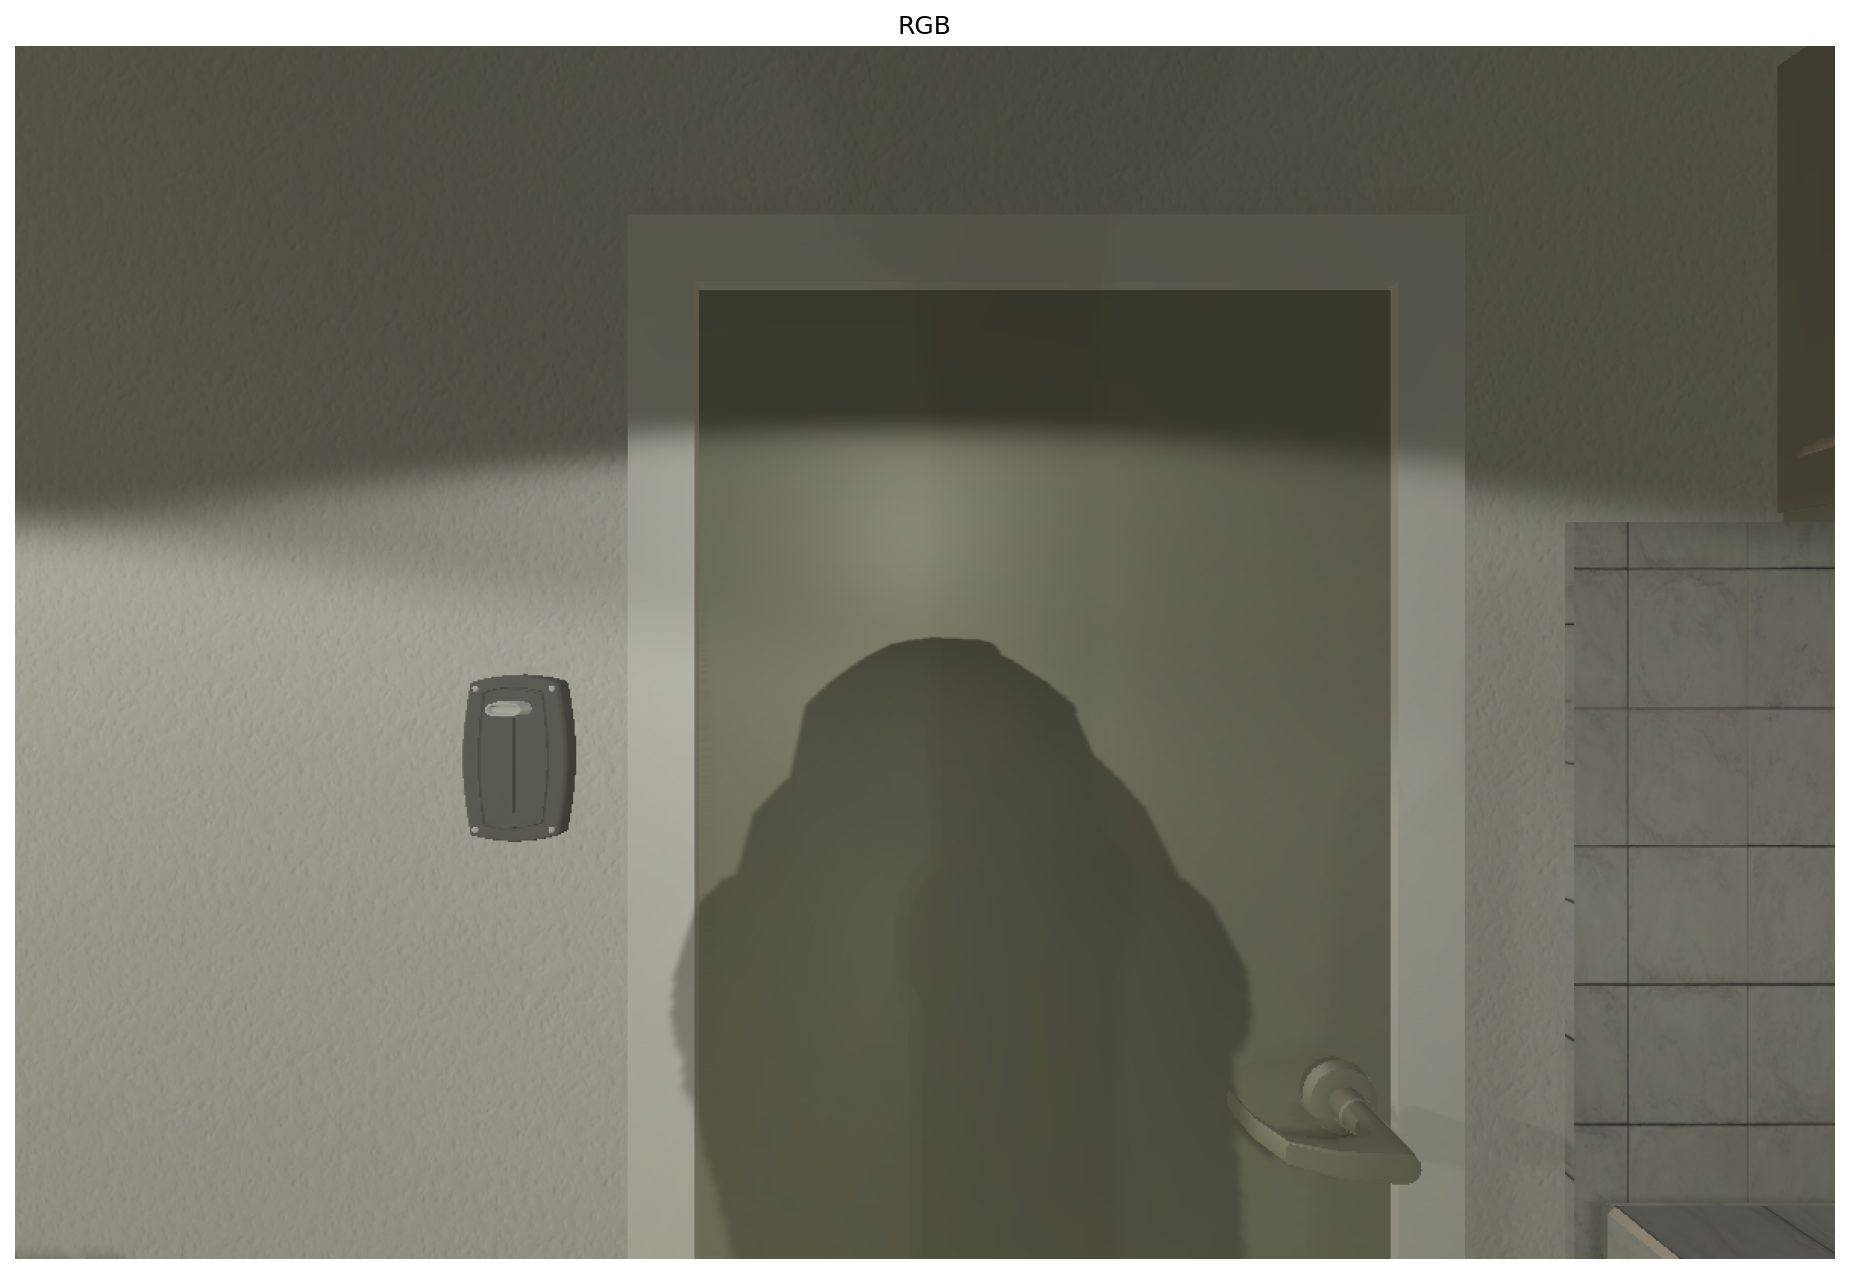

In [7]:
command = w

event = controller.step(command)
agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller)

plot_frames(controller.last_event)

---